# Human Single Neuron Recordings

The purpose of this script is to analyze single neuron recordings in a human. \
The data contains neuropixel recordings from one human. Containing 384 electrode recordings at 2500 samples per second over 833 seconds.

The data set can be dowloaded at https://dandiarchive.org/dandiset/000397?search=neuropixel&page=1&sortOption=3&sortDir=1&showDrafts=true&showEmpty=false&pos=2. \
The data overview can be found at https://datadryad.org/stash/dataset/doi:10.5061/dryad.d2547d840. \
The technical report on the recording can be foudn at https://www.nature.com/articles/s41593-021-00997-0.

In [42]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget
import matplotlib.pyplot as plt


io = NWBHDF5IO('000397/sub-Pt01/sub-Pt01_ecephys.nwb', mode='r')
nwb = io.read()

nwb2widget(nwb)

In [2]:
nwb.fields

{'session_description': 'Auto-generated by neuroconv',
 'identifier': 'baa38cb2-cc9c-4c26-b93a-5e1426789c74',
 'session_start_time': datetime.datetime(1900, 1, 1, 0, 0, tzinfo=tzoffset(None, -18000)),
 'timestamps_reference_time': datetime.datetime(1900, 1, 1, 0, 0, tzinfo=tzoffset(None, -18000)),
 'file_create_date': [datetime.datetime(2022, 11, 29, 12, 45, 36, 602182, tzinfo=tzoffset(None, -28800))],
 'acquisition': {'ElectricalSeriesLFP': ElectricalSeriesLFP pynwb.ecephys.ElectricalSeries at 0x1629964673008
  Fields:
    comments: no comments
    conversion: 4.6875e-06
    data: <HDF5 dataset "data": shape (2084558, 384), type "<i2">
    description: LFP traces for the processed (lf) SpikeGLX data.
    electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
    offset: 0.0
    rate: 2500.0
    resolution: -1.0
    starting_time: 0.0
    starting_time_unit: seconds
    unit: volts,
  'ElectricalSeriesRaw': ElectricalSeriesRaw pynwb.ecephys.ElectricalSeries at 0x16299646

In [8]:
# How many electrodes are there?
electrodes = nwb.electrodes.to_dataframe()
print(electrodes.shape[0])
electrodes

768


,location,group,group_name,channel_name,inter_sample_shift,gain_to_uV,rel_x,offset_to_uV,rel_y,shank_electrode_number,contact_shapes
id,,,,,,,,,,,
0,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x162996467...,s0,AP0,0.000000,2.34375,16.0,0.0,0.0,0.0,square
1,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x162996467...,s0,AP1,0.000000,2.34375,48.0,0.0,0.0,1.0,square
2,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x162996467...,s0,AP2,0.083333,2.34375,0.0,0.0,20.0,2.0,square
3,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x162996467...,s0,AP3,0.083333,2.34375,32.0,0.0,20.0,3.0,square
4,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x162996467...,s0,AP4,0.166667,2.34375,16.0,0.0,40.0,4.0,square
...,...,...,...,...,...,...,...,...,...,...,...
763,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x162996467...,s0,LF379,0.750000,4.68750,32.0,0.0,3780.0,379.0,square
764,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x162996467...,s0,LF380,0.833333,4.68750,16.0,0.0,3800.0,380.0,square
765,unknown,s0 pynwb.ecephys.ElectrodeGroup at 0x162996467...,s0,LF381,0.833333,4.68750,48.0,0.0,3800.0,381.0,square


In [31]:
print(electrical_series_lfp)

ElectricalSeriesLFP pynwb.ecephys.ElectricalSeries at 0x1629964673008
Fields:
  comments: no comments
  conversion: 4.6875e-06
  data: <HDF5 dataset "data": shape (2084558, 384), type "<i2">
  description: LFP traces for the processed (lf) SpikeGLX data.
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  offset: 0.0
  rate: 2500.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: volts



In [33]:
import numpy as np
import pandas as pd

# generate timestamps
start_time = electrical_series_lfp.starting_time
end_time = start_time + electrical_series_lfp.data.shape[0] / electrical_series_lfp.rate
timestamps = np.linspace(start_time, end_time, num=electrical_series_lfp.data.shape[0])

# convert the ElectricalSeriesLFP to a pandas dataframe
df = pd.DataFrame(
    electrical_series_lfp.data[:],
    index=pd.TimedeltaIndex(timestamps, unit=electrical_series_lfp.starting_time_unit).total_seconds(),
    columns=[f'Channel {i+1}' for i in range(electrical_series_lfp.data.shape[1])]
)


In [34]:
df

,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Channel 9,Channel 10,...,Channel 375,Channel 376,Channel 377,Channel 378,Channel 379,Channel 380,Channel 381,Channel 382,Channel 383,Channel 384
0.0000,-57,-23,-35,-53,-44,-32,-61,-127,-67,-50,...,-116,-117,-164,-147,-109,-212,-206,-154,-208,-135
0.0004,-57,-23,-47,-53,-44,-32,-61,-127,-67,-50,...,-128,-117,-164,-147,-121,-224,-218,-166,-220,-147
0.0008,-61,-23,-47,-54,-48,-34,-62,-127,-69,-51,...,-128,-118,-163,-147,-124,-228,-219,-169,-218,-151
0.0012,-54,-19,-43,-48,-44,-26,-58,-122,-65,-49,...,-132,-121,-162,-150,-123,-229,-223,-173,-216,-158
0.0016,-59,-22,-41,-48,-46,-32,-57,-121,-68,-51,...,-135,-121,-162,-151,-126,-233,-225,-171,-214,-161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833.8216,46,32,65,76,15,64,38,26,22,-8,...,0,5,-36,0,-40,-50,-48,-58,-68,-48
833.8220,44,32,64,75,14,67,36,25,24,-6,...,-4,0,-36,0,-36,-46,-44,-52,-64,-47
833.8224,46,35,68,78,15,65,37,23,24,-6,...,-3,5,-33,3,-38,-46,-44,-51,-65,-46
833.8228,50,37,69,79,19,70,41,27,29,0,...,3,10,-28,7,-34,-44,-42,-53,-60,-44


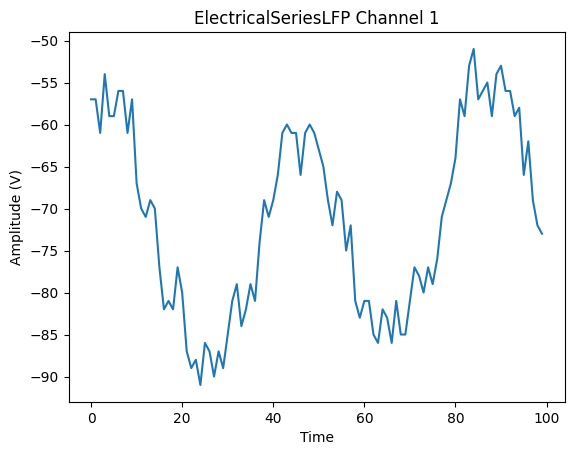

In [41]:
import matplotlib.pyplot as plt

# get the ElectricalSeriesLFP object
electrical_series_lfp = nwb.acquisition['ElectricalSeriesLFP']

# plot the first channel
channel_1_data = electrical_series_lfp.data[:100, 0]
plt.plot(channel_1_data)
plt.xlabel('Time')
plt.ylabel('Amplitude (V)')
plt.title(f'ElectricalSeriesLFP Channel 1')
plt.show()


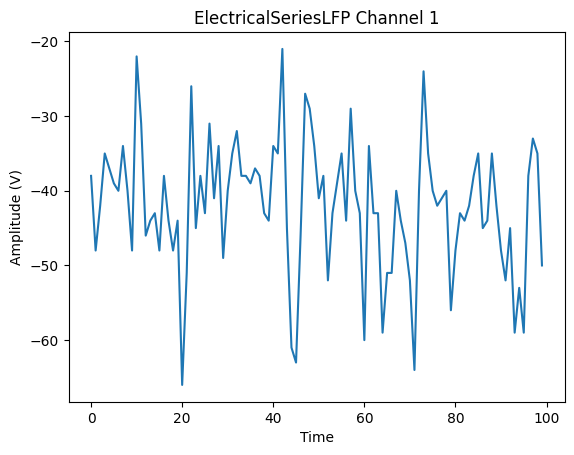

In [40]:
# get the ElectricalSeriesLFP object
electrical_series_lfp = nwb.acquisition['ElectricalSeriesRaw']

# plot the first channel
channel_1_data = electrical_series_lfp.data[:100, 0]
plt.plot(channel_1_data)
plt.xlabel('Time')
plt.ylabel('Amplitude (V)')
plt.title(f'ElectricalSeriesLFP Channel 1')
plt.show()
